Tabitha Saintilien, Jason Kaplun, Eric Breitenbach, Eliza Hernanadez

Clearly define a business problem that can be addressed through the application of analytics. Who does the problem affect? What are the financial and social implications of a potential solution? (10 pts)

The business problem identified from the airplane passenger satisfaction dataset is the inconsistency in performance across flights. This issue significantly affects both passengers and the airline company. Passengers experience frustration and inconvenience when flights are delayed or services are not above standard. This can impact their overall satisfaction and potentially leading to dissatisfaction with the airline.


On the business side, frequent delays or poor performance within the services provided can result in increased operational costs, compensation claims, and potential loss of customer loyalty. Additionally, airlines may face reputational damage, affecting their competitiveness in the market. Addressing this problem through analytics can involve predicting potential delays, optimizing performance training, and implementing proactive measures to minimize faults. A more punctual service could enhance passenger satisfaction, reduce operational expenses, and contribute to a positive brand image, ultimately benefiting both passengers and the airline financially and socially.

In [ ]:
# kNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from io import StringIO
import requests


url = "https://msuweb.montclair.edu/~kaplunj2/train.csv"


response = requests.get(url)
csv_data = StringIO(response.text)
a_data = pd.read_csv(csv_data, sep=',')

a_data.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [ ]:
a_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
a_data['satisfaction'] = label_encoder.fit_transform(a_data['satisfaction'])

predictors = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
a_data_cleaned = a_data[predictors + ['satisfaction']].dropna()

X = pd.get_dummies(a_data_cleaned[predictors], drop_first=True)

y = a_data_cleaned['satisfaction']


In [ ]:
sns.pairplot(a_data)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

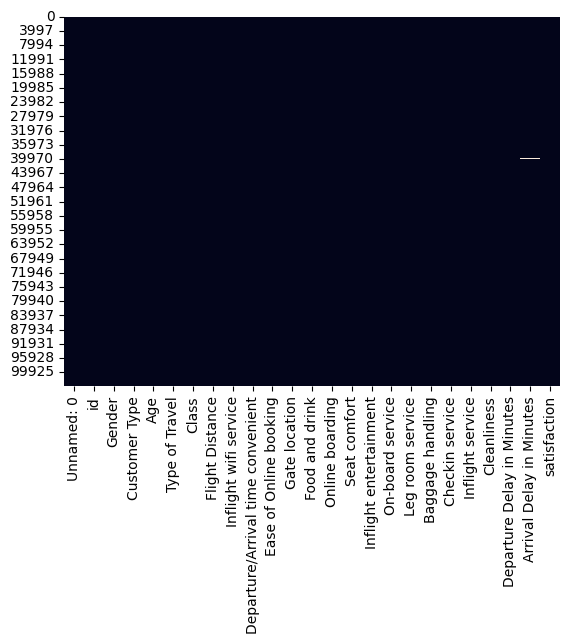

In [ ]:
sns.heatmap(a_data.isnull(), cbar=False)

In [ ]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)



In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_X, train_y)

KNeighborsClassifier(metric='euclidean')

In [ ]:
from sklearn.metrics import roc_auc_score

probabilities = knn.predict_proba(valid_X)

print('ROC AUC: ', roc_auc_score(valid_y, probabilities[:, 1]))

ROC AUC:  0.9685263746579685


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,train_X,train_y.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

In [ ]:
print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  26


In [ ]:
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(train_X, train_y)

y_pred_kNN = knn.predict(valid_X)

In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(valid_y, probabilities[:, 1]))

ROC AUC:  0.9685263746579685


In [ ]:
print(classification_report(valid_y,y_pred_kNN))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     17726
           1       0.96      0.86      0.91     13353

    accuracy                           0.92     31079
   macro avg       0.93      0.92      0.92     31079
weighted avg       0.93      0.92      0.92     31079



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(valid_y, y_pred_kNN)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.37%


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(train_X,train_y)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_lr = logmodel.predict(valid_X)

In [ ]:
print('satisfaction: ', a_data.satisfaction.mean())

satisfaction:  0.43333269171542965


In [ ]:
roc_auc = roc_auc_score(valid_y, y_pred_lr)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8708446562250387


In [ ]:
print(classification_report(valid_y,y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     17726
           1       0.87      0.84      0.85     13353

    accuracy                           0.88     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.88      0.88      0.87     31079



In [ ]:
accuracy = accuracy_score(valid_y, y_pred_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.53%


In [ ]:
# Random Forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(train_X,train_y)

y_pred_rf = rf_model.predict(valid_X)

confusion_matrix(valid_y,y_pred_rf)

array([[16676,  1050],
       [ 1329, 12024]])

In [ ]:
print(classification_report(valid_y,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17726
           1       0.92      0.90      0.91     13353

    accuracy                           0.92     31079
   macro avg       0.92      0.92      0.92     31079
weighted avg       0.92      0.92      0.92     31079



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(train_X,train_y)

y_pred_bt = bt_model.predict(valid_X)

confusion_matrix(valid_y,y_pred_bt)

array([[16706,  1020],
       [ 1160, 12193]])

In [ ]:
print(classification_report(valid_y,y_pred_bt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17726
           1       0.92      0.91      0.92     13353

    accuracy                           0.93     31079
   macro avg       0.93      0.93      0.93     31079
weighted avg       0.93      0.93      0.93     31079



In [ ]:
accuracy = accuracy_score(valid_y, y_pred_rf)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.35%


In [ ]:
accuracy = accuracy_score(valid_y, y_pred_bt)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.99%


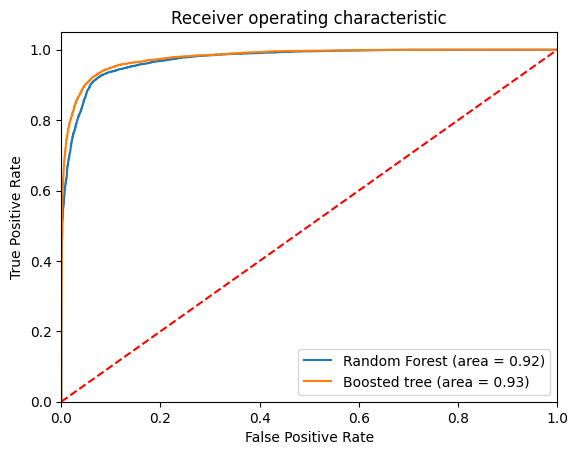

In [ ]:
rf_roc_auc = roc_auc_score(valid_y, rf_model.predict(valid_X))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(valid_y, rf_model.predict_proba(valid_X)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(valid_y, bt_model.predict(valid_X))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(valid_y, bt_model.predict_proba(valid_X)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('Random Forest ROC AUC: ', rf_roc_auc)

Random Forest ROC AUC:  0.9206183910436946


In [ ]:
print('Boosted Tree ROC AUC: ', bt_roc_auc)

Boosted Tree ROC AUC:  0.9277927715989333


In [ ]:
# XGBoost
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_X,train_y)

preds_xg = xg_reg.predict(valid_X)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.472214        0.000045        0.472254       0.000091
1         0.453309        0.000128        0.453364       0.000013
2         0.426852        0.000130        0.426914       0.000028
3         0.413221        0.000193        0.413329       0.000087
4         0.399434        0.000250        0.399571       0.000179

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

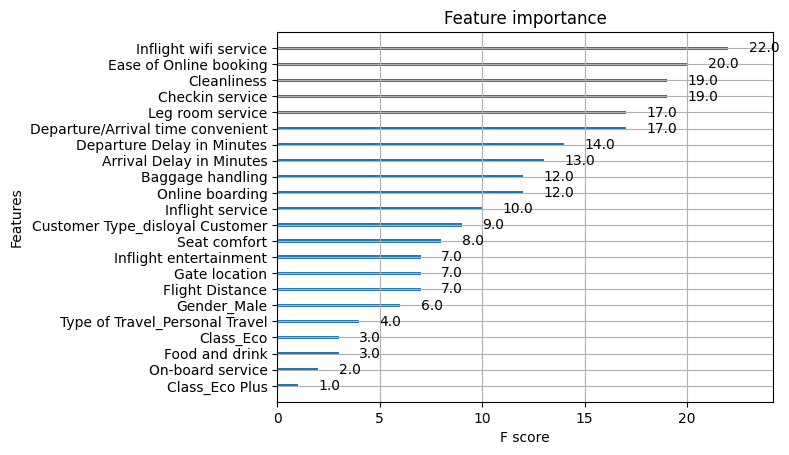

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score


model = xgb.XGBClassifier()
model.fit(train_X, train_y)


y_pred_xg = model.predict_proba(valid_X)[:, 1]


roc_auc = roc_auc_score(valid_y, y_pred_xg)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9948826735783043


In [ ]:
threshold = 0.5
y_pred_binary = (y_pred_xg > threshold).astype(int)



print(classification_report(valid_y, y_pred_binary))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17726
           1       0.97      0.94      0.96     13353

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



In [ ]:
threshold = 0.5
y_pred_binary = (y_pred_xg > threshold).astype(int)


binary_accuracy = accuracy_score(valid_y, y_pred_binary)
print(f"Accuracy: {binary_accuracy * 100:.2f}%")

Accuracy: 96.24%


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # Log-uniform distribution
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'subsample': hp.uniform('subsample', 0.8, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.8, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5)
    # Add more hyperparameters as needed
}





In [ ]:
def objective(params):
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'error',
        'tree_method': 'hist',  # Use 'hist' for faster training
        'seed': 42,  # Set a seed for reproducibility
        **params
    }

    dtrain = xgb.DMatrix(train_X, label=train_y)

    cv_results = xgb.cv(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=500,
        early_stopping_rounds=10,
        metrics="error",
        seed=42,
        nfold=5
    )


    return {'loss': cv_results['test-error-mean'].min(), 'status': STATUS_OK}


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [18:42<00:00, 11.23s/trial, best loss: 0.03710956353857823]


In [ ]:
print("Best Hyperparameters:", best_hyperparams)

Best Hyperparameters: {'colsample_bytree': 0.929474577316282, 'gamma': 0.2701553366053366, 'learning_rate': 0.09904020399670611, 'max_depth': 5, 'subsample': 0.9667046031936651}


In [ ]:
xg_reg_opt = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.929474577316282, gamma = 0.2701553366053366, learning_rate = 0.09904020399670611 ,max_depth = 5, subsample = 0.9667046031936651, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg_opt.fit(train_X,train_y)

preds_xg_opt = xg_reg_opt.predict(valid_X)

In [ ]:
roc_auc = roc_auc_score(valid_y, preds_xg_opt)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9157116117035508


In [ ]:
print(classification_report(valid_y,preds_xg_opt))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17726
           1       0.93      0.88      0.91     13353

    accuracy                           0.92     31079
   macro avg       0.92      0.92      0.92     31079
weighted avg       0.92      0.92      0.92     31079



In [ ]:
threshold = 0.5
y_pred_xgb_binary = (preds_xg_opt > threshold).astype(int)


binary_accuracy = accuracy_score(valid_y, y_pred_binary)
print(f"Accuracy: {binary_accuracy * 100:.2f}%")

Accuracy: 96.24%


In [ ]:
# ANN MLPC
from sklearn.neural_network import MLPClassifier

scaler = MinMaxScaler()
scaler.fit(train_X)

X_train = scaler.transform(train_X)
X_test = scaler.transform(valid_X)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(train_X, train_y)

y_pred_mlpc = MLPC_model.predict(valid_X)

print('ROC AUC: ', roc_auc_score(valid_y,MLPC_model.predict_proba(valid_X)[:,1]))

ROC AUC:  0.9902483014468925


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(confusion_matrix(valid_y ,y_pred_mlpc))
print(classification_report(valid_y, y_pred_mlpc))

[[17088   638]
 [  939 12414]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17726
           1       0.95      0.93      0.94     13353

    accuracy                           0.95     31079
   macro avg       0.95      0.95      0.95     31079
weighted avg       0.95      0.95      0.95     31079



In [ ]:
accuracy = accuracy_score(valid_y, y_pred_mlpc)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.93%


In [ ]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,train_X,train_y.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

In [ ]:
print('Optimal hidden layer size (ROC AUC): ', (cv_scores.index(max(cv_scores))+1)*5)

Optimal hidden layer size (ROC AUC):  20


In [ ]:
# Rebuild with optimal hidden nodes
MLPC_model_opt = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model_opt.fit(train_X, train_y)

y_pred_mlpc_opt = MLPC_model.predict(valid_X)

print('ROC AUC: ', roc_auc_score(valid_y,MLPC_model.predict_proba(valid_X)[:,1]))

ROC AUC:  0.9902483014468925


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(confusion_matrix(valid_y,y_pred_mlpc_opt))
print(classification_report(valid_y,y_pred_mlpc_opt))

[[17088   638]
 [  939 12414]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17726
           1       0.95      0.93      0.94     13353

    accuracy                           0.95     31079
   macro avg       0.95      0.95      0.95     31079
weighted avg       0.95      0.95      0.95     31079



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=train_X,
          y=train_y,
          batch_size=128,
          epochs=100,
          validation_data=(valid_X, valid_y), verbose=1
          )

Epoch 1/100
567/567 [==============================] - 5s 4ms/step - loss: 0.3649 - val_loss: 0.2682
Epoch 2/100
567/567 [==============================] - 1s 3ms/step - loss: 0.2342 - val_loss: 0.2050
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1940 - val_loss: 0.1796
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1748 - val_loss: 0.1635
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1626 - val_loss: 0.1549
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1545 - val_loss: 0.1462
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1484 - val_loss: 0.1509
Epoch 8/100
567/567 [==============================] - 1s 2ms/step - loss: 0.1446 - val_loss: 0.1382
Epoch 9/100
567/567 [==============================] - 2s 3ms/step - loss: 0.1408 - val_loss: 0.1395
Epoch 10/100
567/567 [==============================] - 2s 4ms/step - loss: 0.1385 - val_lo

<Axes: >

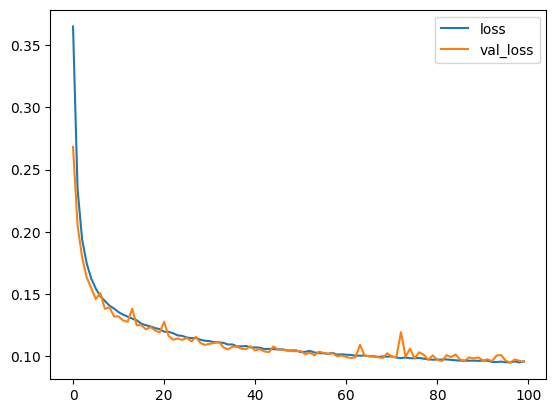

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=train_X,
          y=train_y,
          batch_size=128,
          epochs=500,
          validation_data=(valid_X, valid_y), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
567/567 [==============================] - 6s 7ms/step - loss: 0.3662 - val_loss: 0.2752
Epoch 2/500
567/567 [==============================] - 3s 4ms/step - loss: 0.2375 - val_loss: 0.2054
Epoch 3/500
567/567 [==============================] - 2s 4ms/step - loss: 0.1952 - val_loss: 0.1801
Epoch 4/500
567/567 [==============================] - 2s 4ms/step - loss: 0.1739 - val_loss: 0.1624
Epoch 5/500
567/567 [==============================] - 3s 5ms/step - loss: 0.1601 - val_loss: 0.1522
Epoch 6/500
567/567 [==============================] - 4s 7ms/step - loss: 0.1521 - val_loss: 0.1482
Epoch 7/500
567/567 [==============================] - 2s 4ms/step - loss: 0.1475 - val_loss: 0.1421
Epoch 8/500
567/567 [==============================] - 1s 2ms/step - loss: 0.1428 - val_loss: 0.1441
Epoch 9/500
567/567 [==============================] - 1s 2ms/step - loss: 0.1403 - val_loss: 0.1388
Epoch 10/500
567/567 [==============================] - 1s 2ms/step - loss: 0.1363 - val_lo

<Axes: >

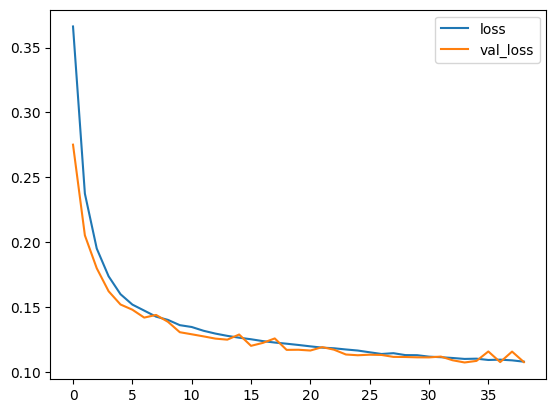

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Dropout
from tensorflow.keras.layers import Dropout

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=train_X,
          y=train_y,
          batch_size=128,
          epochs=200,
          validation_data=(valid_X, valid_y), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
567/567 [==============================] - 6s 6ms/step - loss: 0.5081 - val_loss: 0.3503
Epoch 2/200
567/567 [==============================] - 3s 5ms/step - loss: 0.3896 - val_loss: 0.3154
Epoch 3/200
567/567 [==============================] - 3s 5ms/step - loss: 0.3557 - val_loss: 0.2856
Epoch 4/200
567/567 [==============================] - 3s 6ms/step - loss: 0.3279 - val_loss: 0.2568
Epoch 5/200
567/567 [==============================] - 5s 10ms/step - loss: 0.3088 - val_loss: 0.2367
Epoch 6/200
567/567 [==============================] - 4s 7ms/step - loss: 0.2958 - val_loss: 0.2181
Epoch 7/200
567/567 [==============================] - 4s 6ms/step - loss: 0.2814 - val_loss: 0.2067
Epoch 8/200
567/567 [==============================] - 1s 3ms/step - loss: 0.2725 - val_loss: 0.1958
Epoch 9/200
567/567 [==============================] - 2s 4ms/step - loss: 0.2684 - val_loss: 0.1958
Epoch 10/200
567/567 [==============================] - 2s 4ms/step - loss: 0.2552 - val_l

In [ ]:
y_pred_TF = model.predict(X_test)

972/972 [==============================] - 1s 1ms/step


In [ ]:
# .predict() method produces probabilities

y_pred_bin_TF = y_pred_TF>.5

In [ ]:
print(classification_report(valid_y,y_pred_bin_TF))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     17726
           1       0.96      0.92      0.94     13353

    accuracy                           0.95     31079
   macro avg       0.95      0.94      0.95     31079
weighted avg       0.95      0.95      0.95     31079



In [ ]:
print('ROC AUC: ', roc_auc_score(valid_y,y_pred_TF))

ROC AUC:  0.9891523628113951


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(valid_y, y_pred_bin_TF)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.85%


<Axes: >

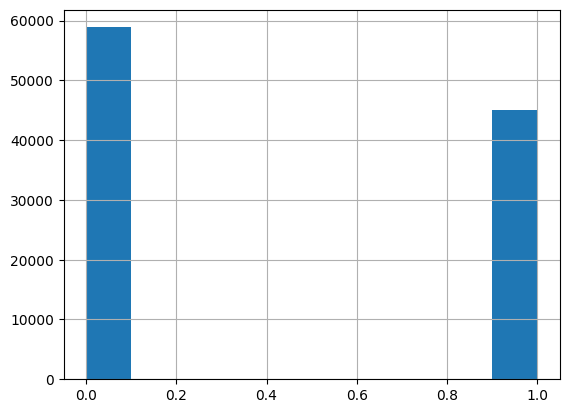

In [ ]:
# Feature Importance
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

a_data.satisfaction.hist()

In [ ]:
a_data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
a_data.dropna(inplace=True)

In [ ]:
a_data['Gender'] = label_encoder.fit_transform(a_data['Gender'])
a_data['Customer Type'] = label_encoder.fit_transform(a_data['Customer Type'])
a_data['Type of Travel'] = label_encoder.fit_transform(a_data['Type of Travel'])
a_data['Class'] = label_encoder.fit_transform(a_data['Class'])
a_data['satisfaction'] = label_encoder.fit_transform(a_data['satisfaction'])

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(train_X,train_y)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_fi = logmodel.predict(valid_X)

In [ ]:
train_y = train_y.reset_index(drop=True)
train_X = train_X.reset_index(drop=True)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(train_y, train_X)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.370682
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Method:                 MLE       
Dependent Variable:         satisfaction           Pseudo R-squared:       0.459     
Date:                       2023-12-13 03:15       AIC:                    53806.0212
No. Observations:           72515                  BIC:                    54017.4268
Df Model:                   22                     Log-Likelihood:         -26880.   
Df Residuals:               72492                  LL-Null:                -49649.   
Converged:                  1.0000                 LLR p-value:            0.0000    
No. Iterations:             7.0000                 Scale:                  1.0000    
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z     P>|z|   [0.02

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f7d063482871fac9bd7c68ab47db9af79815ebf174d82a6aa89c89653ced9b87
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(logmodel).fit(valid_X, valid_y)
eli5.show_weights(perm,  feature_names = X.columns.tolist())

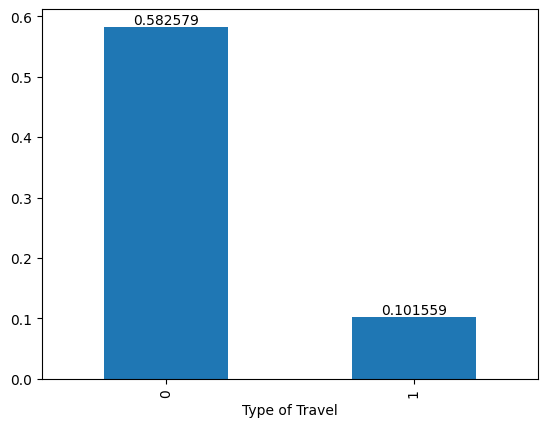

In [ ]:
ax = a_data.groupby('Type of Travel')['satisfaction'].mean().plot.bar()

for container in ax.containers:
    ax.bar_label(container)

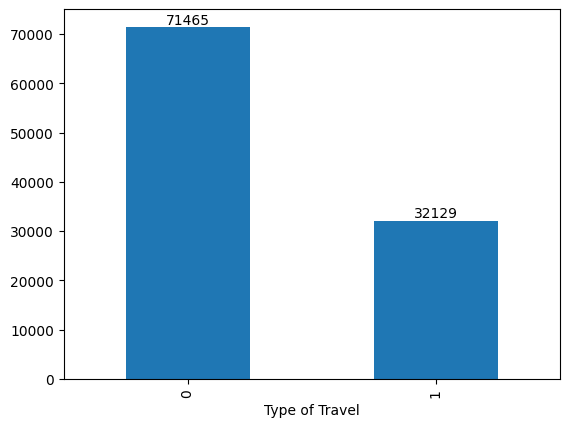

In [ ]:
ax = a_data.groupby('Type of Travel')['satisfaction'].count().plot.bar()

for container in ax.containers:
    ax.bar_label(container)

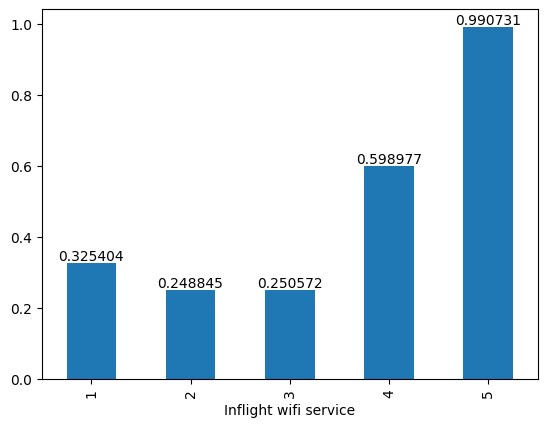

In [ ]:
filtered_data = a_data[a_data['Inflight wifi service'] != 0]

ax = filtered_data.groupby('Inflight wifi service')['satisfaction'].mean().plot.bar()

for container in ax.containers:
    ax.bar_label(container)

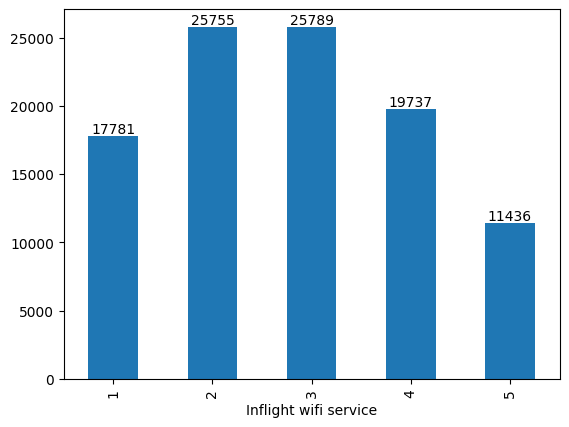

In [ ]:
ax = filtered_data.groupby('Inflight wifi service')['satisfaction'].count().plot.bar()

for container in ax.containers:
    ax.bar_label(container)

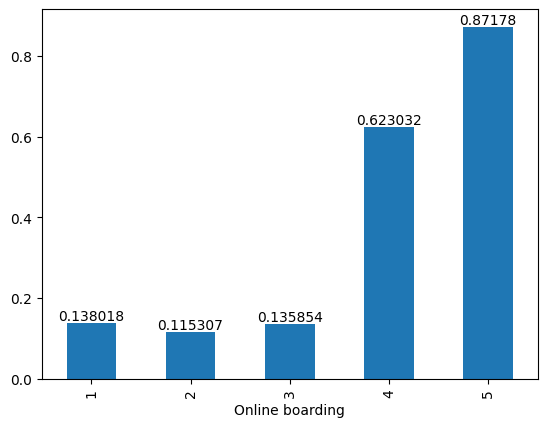

In [ ]:
filtered_data = filtered_data = a_data[a_data['Online boarding'] != 0]

ax = filtered_data.groupby('Online boarding')['satisfaction'].mean().plot.bar()

for container in ax.containers:
    ax.bar_label(container)

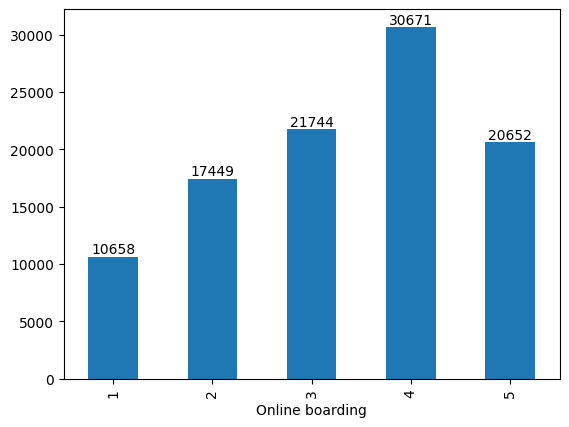

In [ ]:
ax = filtered_data.groupby('Online boarding')['satisfaction'].count().plot.bar()

for container in ax.containers:
    ax.bar_label(container)